In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
import json
import networkx as nx
import matplotlib.pyplot as plt

"""
Python 3 function to convert rumour annotations into True, False, Unverified
"""

def convert_annotations(annotation, string = True):
    if 'misinformation' in annotation.keys() and 'true'in annotation.keys():
        if int(annotation['misinformation'])==0 and int(annotation['true'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==0 and int(annotation['true'])==1 :
            if string:
                label = "true"
            else:
                label = 1
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==0 :
            if string:
                label = "false"
            else:
                label = 0
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==1:
            print ("OMG! They both are 1!")
            print(annotation['misinformation'])
            print(annotation['true'])
            label = None
            
    elif 'misinformation' in annotation.keys() and 'true' not in annotation.keys():
        # all instances have misinfo label but don't have true label
        if int(annotation['misinformation'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==1:
            if string:
                label = "false"
            else:
                label = 0
                
    elif 'true' in annotation.keys() and 'misinformation' not in annotation.keys():
        #print ('Has true not misinformation')
        label = None
    else:
        #print('No annotations')
        label = None
           
    return label


In [2]:
import os
# Create a DataFrame from the lists
df = pd.DataFrame(columns=['TweetID', 'IsRumour', 'IsTrue','Path'])
df
count=0
Incidentdirectory = './Data/PHEME_veracity/all-rnr-annotated-threads/'
for subdirectoryIncident in os.listdir(Incidentdirectory):
    subdirectoryIncident_path = os.path.join(Incidentdirectory, subdirectoryIncident)
    if os.path.isdir(subdirectoryIncident_path):
        rmourOrnonrumour=['rumours','non-rumours']
        for rumourLabel in rmourOrnonrumour:
            directory =subdirectoryIncident_path+'/'+rumourLabel
            #directory = './Data/PHEME_veracity/all-rnr-annotated-threads/ottawashooting-all-rnr-threads/'+rumourLabel
            for subdirectory in os.listdir(directory):
                    subdirectory_path = os.path.join(directory, subdirectory)
                    if os.path.isdir(subdirectory_path):
                        count=count+1
                        #print("Subdirectory: ",count, subdirectory_path )
                        # Open and read the JSON file
                        file_path=subdirectory_path+'/annotation.json'
                        with open(file_path, 'r') as file:
                            data = json.load(file)
                            my_dict = {}
                            for key, value in data.items():
                                my_dict[key] = value
                            #print(convert_annotations(my_dict))
                            # Create a dictionary with the data for the new row
                            new_row_data = {
                                'TweetID': subdirectory,
                                'IsRumour':  my_dict['is_rumour'],
                                'IsTrue':convert_annotations(my_dict) ,#'true' if my_dict['is_rumour']=='nonrumour' else convert_annotations(my_dict) ,
                                'Path':subdirectory_path
                            }
                            # Convert the dictionary to a DataFrame
                            new_row_df = pd.DataFrame(new_row_data, index=[0])
                            # Concatenate the new row DataFrame with the original DataFrame
                            df = pd.concat([df, new_row_df], ignore_index=True)
df

,TweetID,IsRumour,IsTrue,Path
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
...,...,...,...,...
6420,544521260840267776,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...
6421,544521433473634304,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...
6422,544521788777304064,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...
6423,544521880661950464,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...


In [3]:
# Get the value counts of 'IsTrue'
value_counts = df['IsTrue'].value_counts()

print("Value Counts of 'IsTrue':")
print(value_counts)

Value Counts of 'IsTrue':
true          1067
unverified     697
false          638
Name: IsTrue, dtype: int64


In [4]:
df[df['IsTrue'].isin(['true','false'])]['IsTrue'].unique()
df[df['IsTrue'].isin(['true','false'])]['IsTrue'].value_counts()
df=df[df['IsTrue'].isin(['true','false'])]
df = df.reset_index(drop=True)
df

,TweetID,IsRumour,IsTrue,Path
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...


In [5]:
df['MaxCount']=0
encoding = 'utf-8'
# df
# # Iterate through the DataFrame and add edges to the graph
for index, row in df.iterrows(): # df[:1000].iterrows():
    G = nx.DiGraph()
#     df.iloc[0]['Path']+'/structure.json'    
    fileName=df.iloc[index]['Path']+'/structure.json'
#     print(fileName)
    with open(fileName, 'r', encoding=encoding) as file:
        data = json.load(file)
    # Get the root node
    root_node = next(iter(data))

    # Count the number of first children from the root
    first_children_count = len(data[root_node])
    
    df.loc[index,'MaxCount']=first_children_count#len(nx.dag_longest_path(G))
df


,TweetID,IsRumour,IsTrue,Path,MaxCount
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,5
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,5
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,5
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,3
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,10
...,...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,15
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,0
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,10
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,18


In [6]:
# Convert 'IsTrue' column to boolean
df['IsTrue'] = df['IsTrue'].map({'true': True, 'false': False})
df_sorted = df.sort_values(by='MaxCount', ascending=False)
df_sorted.head(55)

,TweetID,IsRumour,IsTrue,Path,MaxCount
1427,544324444773433348,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
272,553586860334010368,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
291,553588374280601600,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
296,553588993993232384,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
300,553589606307090432,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
302,553590459688570880,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
902,525020326816927744,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
1417,544317609718865920,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
308,553591259672379392,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
347,580319078155468800,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19


In [7]:
# Find the maximum value in the 'MaxCount' column
max_count_value = df['MaxCount'].max()
print(f"For MaxCount={max_count_value}:")
# Filter the DataFrame for rows where 'MaxCount' is equal to the maximum value
# Filter the DataFrame for rows where 'MaxCount' is equal to the maximum value
max_count_rows = df[df['MaxCount'] == max_count_value]

# Count true and false occurrences in the 'IsTrue' column for the maximum 'MaxCount'
true_count = max_count_rows['IsTrue'].sum()
false_count = max_count_rows['IsTrue'].count() - true_count

print(f"For MaxCount={max_count_value}:")
print(f"True count: {true_count}")
print(f"False count: {false_count}")

For MaxCount=19:
For MaxCount=19:
True count: 21
False count: 6


In [8]:
df=df[df['MaxCount']==max_count_value]

In [9]:
df

,TweetID,IsRumour,IsTrue,Path,MaxCount
158,553469733656203264,rumour,False,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
201,553493707472011264,rumour,False,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
208,553503546382249984,rumour,False,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
227,553535441828605953,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
272,553586860334010368,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
275,553587013409325058,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
291,553588374280601600,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
296,553588993993232384,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
300,553589606307090432,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19
302,553590459688570880,rumour,True,./Data/PHEME_veracity/all-rnr-annotated-thread...,19


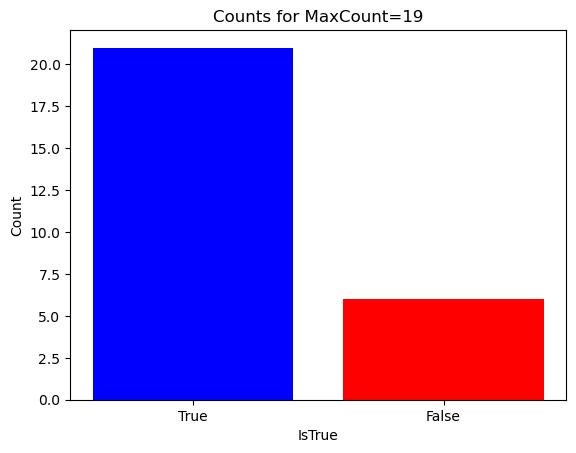

In [10]:

# Create a bar plot
labels = ['True', 'False']
counts = [true_count, false_count]

plt.bar(labels, counts, color=['blue', 'red'])
plt.title(f'Counts for MaxCount={max_count_value}')
plt.xlabel('IsTrue')
plt.ylabel('Count')
plt.show()